# **Project:** Network Attack Detection

**Data set:** UNSW-NB15 Dataset

**Source of Data set:**  https://research.unsw.edu.au/projects/unsw-nb15-dataset

**Information about Data set**
> 1. Training set = 82,332 records 
2. Test set = 175,341 records
3. Features = 49 mentioned here. https://cloudstor.aarnet.edu.au/plus/apps/onlyoffice/s/2DhnLGDdEECo4ys?fileId=206777051

# What is Intrusion Detection System?

Intrusion Detection System (IDS) is a system that monitors network traffic for suspicious activity and issues alerts when such activity is discovered.

**Detection Methods of IDS:**

**1. Signature-based Method:**

It detects the attacks on the basis of the

> 1.1. specific patterns such as number of bytes/ number of 1’s or number of 0’s in the network traffic. 

> 1.2. Known malicious instruction sequence that is used by the malware.

**2. Anomaly-detection Method:**

It detects the attacks using

> 2.1. Machine learning. It creates a trustful activity model and anything coming is compared with that model and it is declared suspicious if it is not found in model 

**Which method is better?**

*Anomaly-detection Method* method is more accepted in comparison to signature-based IDS because the machine learning models can be trained according to the applications and hardware configurations.

















# Problem Statement

Network security is of prime importance these days. We need to protect our data and systems from attackers. A network attack attempts to gain unauthorized access to the network and take advantage of the vulnerablites of the network. 
In this project, we will detect if a network attack is happening over the network using the above mentioned dataset. 

The type of attacks in the dataset are: 
1. Fuzzers
2. Analysis
3. Backdoors
4. DoS
5. Exploits
6. Generic
7. Reconnaissance
8. Shellcode 
9. Worms 

Our ML model will detect if the network is under attack or not.

# 1. Dataset and its Cleaning

**Source**: https://github.com/divyaKh/CMPE255Project/blob/main/2.Data_Cleaning/Dataset_and_its_Cleaning.ipynb

In [73]:
import pandas as pd   #for dataframes
import numpy as np  #for array

import warnings
warnings.filterwarnings("ignore")
from  matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder  #for encoding of categorical columns

In [74]:
# from google.colab import files
# uploaded = files.upload()

In [75]:
train = pd.read_csv('../1.RawData/UNSW_NB15_training-set.csv')
test = pd.read_csv('../1.RawData/UNSW_NB15_training-set.csv')
combine = train.append(test)

In [76]:
combine.shape

(257673, 45)

## 1.1 Dropping unnecessary columns

One such column is 'id', 'attack_cat'

In [77]:
combine = combine.drop(['id', 'attack_cat'],axis=1)
combine.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


When we concatenate two DataFrames then we need to reset the index of the DataFrame. If the dataframe has a multiindex, this method can remove one or more levels. Otherwise if we don't do this, we get an error - "InvalidIndexError: Reindexing only valid with uniquely valued Index objects" 

In [78]:
combine = combine.reset_index(drop=True)

## 1.2 Check for Missing Values

Since the dataset was clean, we donot have any missing values as seen below.

In [79]:
# checking for null values
combine.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label                0
dtype: int6

Getting name of all the columns of the dataset to see what should be the expected datatype of each column

In [80]:
combine.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [81]:
# see if binary columns are really binary
for col in 'is_sm_ips_ports', 'is_ftp_login':
    print(combine[col].value_counts())
    print()

0    253995
1      3678
Name: is_sm_ips_ports, dtype: int64

0    254428
1      3219
4        16
2        10
Name: is_ftp_login, dtype: int64



The col "is_ftp_login" has wrong values like 2 and 4. It should only have binary values like 0 and 1. If the ftp session is accessed by user using correct username and password then 1, otherwise 0. We need to fix this.

Therefore, we are replacing all the values other than 0 and 1 from these two columns.

In [82]:
combine['is_ftp_login'] = np.where(combine['is_ftp_login']>1, 1, combine['is_ftp_login'])

In [83]:
combine['is_ftp_login'].value_counts()

0    254428
1      3245
Name: is_ftp_login, dtype: int64

In [84]:
combine['service'].value_counts()

-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

In the feature "service" we see that we have "-". We need to replace that as well.

In [85]:
# removing all the "-" and replacing those with "None"
combine['service'] = combine['service'].apply(lambda x:"None" if x=="-" else x)

In [86]:
combine['service'].value_counts()

None        141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: service, dtype: int64

#View the One hot encoding preprocessing file here

Since the one hot encoding created more that 150 features, there was chance of overfitting so we proceeded with Label encoding.

https://github.com/divyaKh/CMPE255Project/blob/main/2.Data_Cleaning/Dataset_and_its_Cleaning.ipynb

## 1.3 Encoding Categorical Data

In our dataset we have few categorical columns with text data. But when we apply ML models to our data, then we need every data to be numerical. So we have to convert categorical columns to numerical columns in some way.

### Label encoding

LabelEncoder for feature, encodes labels with a value between 0 and n-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

We are trying this since, One-hot encoder is incresing the number of features from 44 to 197. This may lead to overfitting in the model. So we can use label encoding in that case.
Description : https://github.com/divyaKh/CMPE255Project/blob/main/2.Data_Cleaning/Dataset_and_its_Cleaning.ipynb

In [87]:
from sklearn.preprocessing import LabelEncoder

categorical = []
for col in combine.columns:
    if combine[col].dtype == 'object':
             categorical.append(col)

for col in categorical:
        le = LabelEncoder()
        le.fit(list(combine[col].astype(str).values) + list(combine[col].astype(str).values))
        combine[col] = le.transform(list(combine[col].astype(str).values))

combine

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,119,0,5,2,0,496,0,90909.090200,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.000300,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.005100,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.660800,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.002500,254,...,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,24,13,24,0,0,0,24,24,0,1
257669,0.505762,113,0,4,10,8,620,354,33.612649,254,...,1,1,2,0,0,0,1,1,0,1
257670,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,3,3,13,0,0,0,3,12,0,1
257671,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,30,14,30,0,0,0,30,30,0,1


# 2. EDA

**Source** : https://github.com/divyaKh/CMPE255Project/blob/main/3.EDA/Exploratory_Data_Analysis.ipynb

## **Feature importances on combined dataset**

Feature importance using Tree based classifier. 




### **CART classification**

In [88]:
from sklearn.tree import DecisionTreeClassifier

importance_dict = pd.DataFrame()

clf = DecisionTreeClassifier()
X=combine.drop(columns='label')
y=combine['label']
clf.fit(X, y)
feature_importance = clf.feature_importances_
importance_dict['combined'] =  feature_importance
importance_dict['combined']



0     0.006525
1     0.001628
2     0.002489
3     0.000578
4     0.005552
5     0.002830
6     0.037649
7     0.017333
8     0.007114
9     0.537890
10    0.000185
11    0.009978
12    0.008640
13    0.002384
14    0.000503
15    0.010121
16    0.006377
17    0.006732
18    0.007222
19    0.000017
20    0.010139
21    0.010630
22    0.000000
23    0.008666
24    0.066500
25    0.008619
26    0.066098
27    0.011480
28    0.000213
29    0.003317
30    0.018090
31    0.000196
32    0.004995
33    0.004060
34    0.003412
35    0.036966
36    0.000090
37    0.000034
38    0.005097
39    0.007376
40    0.062276
41    0.000000
Name: combined, dtype: float64

Feature: 0, Score: 0.00684
Feature: 1, Score: 0.00161
Feature: 2, Score: 0.00251
Feature: 3, Score: 0.00062
Feature: 4, Score: 0.00592
Feature: 5, Score: 0.00297
Feature: 6, Score: 0.03738
Feature: 7, Score: 0.01890
Feature: 8, Score: 0.00675
Feature: 9, Score: 0.53762
Feature: 10, Score: 0.00002
Feature: 11, Score: 0.01012
Feature: 12, Score: 0.00852
Feature: 13, Score: 0.00237
Feature: 14, Score: 0.00050
Feature: 15, Score: 0.00987
Feature: 16, Score: 0.00612
Feature: 17, Score: 0.00655
Feature: 18, Score: 0.00717
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.01008
Feature: 21, Score: 0.01049
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00884
Feature: 24, Score: 0.06684
Feature: 25, Score: 0.00914
Feature: 26, Score: 0.06628
Feature: 27, Score: 0.00986
Feature: 28, Score: 0.00330
Feature: 29, Score: 0.00330
Feature: 30, Score: 0.01875
Feature: 31, Score: 0.00052
Feature: 32, Score: 0.00515
Feature: 33, Score: 0.00395
Feature: 34, Score: 0.00337
Feature: 35, Score: 0.03690
Fe

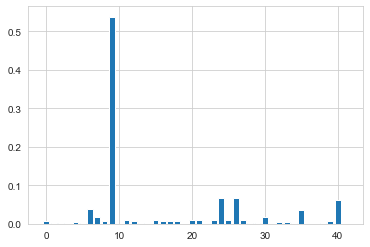

In [89]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Though the 41st feature has no score, we are not dropping it because in the correlation analysis, we saw that it has moderate correlation with the label. From this graph we can infer that the 9th feature ie, rate is most important wrt to label.


In [90]:
combine

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,119,0,5,2,0,496,0,90909.090200,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,119,0,5,2,0,1762,0,125000.000300,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,119,0,5,2,0,1068,0,200000.005100,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,119,0,5,2,0,900,0,166666.660800,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,119,0,5,2,0,2126,0,100000.002500,254,...,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,24,13,24,0,0,0,24,24,0,1
257669,0.505762,113,0,4,10,8,620,354,33.612649,254,...,1,1,2,0,0,0,1,1,0,1
257670,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,3,3,13,0,0,0,3,12,0,1
257671,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,30,14,30,0,0,0,30,30,0,1


### Plot lables

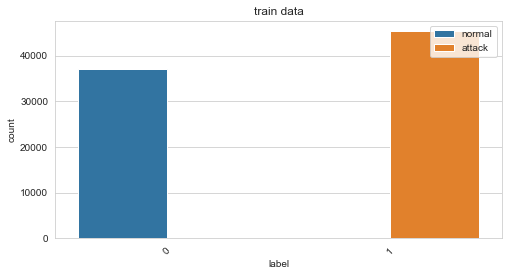

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler


combine['label'].nunique()
def col_countplot(col, train_data=train):
    """
    This function plots countplot of a given feature for train dataset
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot of the given column
    ax = sns.countplot(x=col, hue='label', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'attack'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()
col_countplot('label')

**Since this is not an imbalanced data. We have taken it as it is. If it would have been an imbalanced data. We would have used sampling techniques like SMOTE(S ynthetic M inority O versampling Te chnique).**

Here, The count of unique values of labels are not varying largely, So, that is why we have considered it as a balanced data.


In [92]:
combine.shape

(257673, 43)

# 3. Preprocessing : 

In [93]:
def removeHcorrFeature(percentage,X):
  # Selecting all the features with high correlation values with other features
  # Refer: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
  corr_matrix = X.corr().abs()

  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find index of feature columns with correlation greater than 0.9
  o_drop = [column for column in upper.columns if any(upper[column] > percentage)]
  print(o_drop)
  return o_drop

In [94]:
def applyPCA(X, n_com):
   #print(data_set)
   pca = PCA(n_components=n_com).fit(X)
   X_train_pca = pca.transform(X)
   print(pca.n_components_)
   return X_train_pca

**Appying PCA reduces the number of features to 29**

In [95]:
def applyMinMax(data):  
# scale features
  scaler = MinMaxScaler()
  model=scaler.fit(data)
  scaled_data=model.transform(data)
  return scaled_data
  #print(data_set)

In [96]:
def applyStandardScaler(data):
  scaler = StandardScaler()
  model = scaler.fit(data)
  scaled_data = model.transform(data)
  #print(data_set)
  return scaled_data

In [97]:
combine.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

**Calling function and preparing the dataset**

**Minmax scaling**

In [98]:
X_mm=combine.drop(columns='label')    
y_mm=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm = applyMinMax(X_mm)


Apply MinMax scaler


**Standard scaling**

In [99]:
X_ss=combine.drop(columns='label')    
y_ss=combine['label']
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply Standard scaler")
X_ss = applyStandardScaler(X_ss)

Apply Standard scaler


**Standard scaling + correlation**

In [100]:
X_ss_corr=combine.drop(columns='label')    
y_ss_corr=combine['label']
n_com=0.99
cols = X_ss_corr.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_ss_corr = applyStandardScaler(X_ss_corr)
X_ss_corr = pd.DataFrame(X_ss_corr, columns =cols)
print("Remove highly correlated features with each other")
col = removeHcorrFeature(n_com, X_ss_corr)
print(col)
X_ss_corr.drop(X_ss_corr[col], axis=1, inplace=True)
X_ss_corr.shape

Apply MinMax scaler
Remove highly correlated features with each other
['sloss', 'dloss']
['sloss', 'dloss']


(257673, 40)

Observations: 2 columns have been pruned due to high correlation with other features, other than target.

**MinMax Scaling+ Correlation**

In [101]:
X_mm_corr=combine.drop(columns='label')    
y_mm_corr=combine['label']
n_com=0.99
cols = X_mm_corr.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply MinMax scaler")
X_mm_corr = applyMinMax(X_mm_corr)
X_mm_corr = pd.DataFrame(X_mm_corr, columns =cols)
print("Remove highly correlated features with each other")
col = removeHcorrFeature(n_com, X_mm_corr)
print(col)
X_mm_corr.drop(X_mm_corr[col], axis=1, inplace=True)
X_mm_corr.shape

Apply MinMax scaler
Remove highly correlated features with each other
['sloss', 'dloss']
['sloss', 'dloss']


(257673, 40)

If we keep correlation check for more than 95%, we will lose most of the data. So to optimize the we have taken percentage as 99. we can in correlation matrix here that : sloss, dloss are highly correlated to sbytes,dbytes repectively. So keeping one of those two column would reduce noise and also, the columns loss, dloss are not adding new information to the data. Hence, We will be dropping those when applying correlation analysis dropping 'sloss', 'dloss'

**Apply Standard scaler+PCA**

**We want to capture 99% of the variance of the dataset, and also reduced features so, applying PCA.**

In [102]:
from sklearn.decomposition import PCA
X_pca=combine.drop(columns='label')    
y_pca=combine['label']
n_com=0.99
cols = X_pca.columns
#Add min max scaler and return the dataset in pandas dataframe :
print("Apply Standard scaler")
X_pca = applyStandardScaler(X_pca)
X_pca = pd.DataFrame(X_pca, columns =cols)
X_pca = applyPCA(X_pca, n_com)
X_pca.shape

Apply Standard scaler
29


(257673, 29)

**OBSERVATION:**After apply PCA the features got reduces to 29. That means that 
number of features that captures 99% variance has been reduced to 29 from 42.

**Applying standard scaler is an important steps before applying PCA.**

**Note : 'X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr.

X= the feature set before applying any preprocessing

X_pca= The feature set after applying Standard scaling and PCA.

X_mm_corr = The feature set after applying MinMax scaling and correlation analysis

X_mm= The feature set after applying MinMax scaling

X_ss= The feature set after applying standard scaling

X_ss_corr = The feature set after applying standard scaling and correaltion analysis.

y= the target set before applying any preprocessing

y_pca= The target set after applying Standard scaling and PCA.

y_mm_corr = The target set after applying MinMax scaling and correlation analysis

y_mm= The target set after applying MinMax scaling

y_ss= The target set after applying standard scaling

y_ss_corr = The target set after applying standard scaling and correaltion analysis.



# Train, Test different ML models and Result Analysis

In [103]:
def modelAnalysis(acc, f1, model, classifier_name):
  dataset1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
  j1=['y','y_pca','y_mm_corr','y_mm','y_ss','y_ss_corr']
  dataset = [X,X_pca,X_mm_corr,X_mm,X_ss,X_ss_corr]
  j=[y,y_pca,y_mm_corr,y_mm,y_ss,y_ss_corr]
  for i in range(0,len(dataset)): 
    start = time.process_time()
    print("X=",dataset1[i])
    print("y=",j1[i])
    X_train, X_test, y_train, y_test = train_test_split(dataset[i], j[i], test_size=0.3)
    model.fit(X_train, y_train)
    predicted_y = model.predict(X_test)
    print(metrics.classification_report(y_test, predicted_y))
    print(metrics.confusion_matrix(y_test, predicted_y))
    predicted_y_train = model.predict(X_train)
    print(accuracy_score(y_train, predicted_y_train))
    acc.append(accuracy_score(y_test, predicted_y))
    print(classifier_name+' model accuracy score: {0:0.4f}'. format(acc[-1]))
    f1.append(f1_score(y_test,predicted_y))
    print("f1_score:",f1[-1])
    print("Time taken to complete:")
    print(time.process_time() - start)
    #plot ROC curve
    metrics.plot_roc_curve(model, X_test, y_test)
    plt.title("ROC of"+classifier_name)
    plt.savefig(classifier_name+dataset1[i]+".png")  
    plt.show()


In [104]:
import matplotlib.pyplot as plt
list1 = ['X','X_pca','X_mm_corr','X_mm','X_ss','X_ss_corr']
def displayAnalysisGraphs(list1, acc,f1,model):
  plt.bar(list1,acc,width = 0.4)
  for i in range(len(list1)):
    acc[i]=float('{:,.3f}'.format(acc[i]))
    plt.annotate(str(acc[i]), xy=(list1[i], acc[i]))
  plt.ylabel("Accuracy")
  plt.title("Accuracy for dataset after different preprocessing techniques for "+model)
  plt.savefig("Accuracy"+model+".png")
  plt.show()
  plt.bar(list1,f1,width = 0.4)
  for i in range(len(list1)):
    f1[i]=float('{:,.3f}'.format(f1[i]))
    plt.annotate(str(f1[i]), xy=(list1[i], f1[i]))
  plt.ylabel("F1 score")
  plt.title("F1 scores for dataset after different preprocessing techniques for "+model)
  plt.savefig("F1_scores"+model+".png")
  plt.show()

# XGBoost
For more work, go to: https://github.com/divyaKh/CMPE255Project/blob/main/5.ML_Models/baseline/XGBoost.ipynb

In [105]:
import sys

In [106]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
#check accuracy score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import time

X= X
y= y
[15:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     27893
           1       0.97      0.95      0.96     49409

    accuracy                           0.95     77302
   macro avg       0.94      0.95      0.94     77302
weighted avg       0.95      0.95      0.95     77302

[[26301  1592]
 [ 2407 47002]]
0.9574210931912558
XGBoost model accuracy score: 0.9483
f1_score: 0.9591951266797955
Time taken to complete:
72.1875


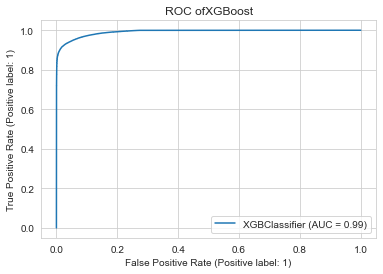

X= X_pca
y= y_pca
[15:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     27992
           1       0.93      0.95      0.94     49310

    accuracy                           0.92     77302
   macro avg       0.92      0.91      0.92     77302
weighted avg       0.92      0.92      0.92     77302

[[24646  3346]
 [ 2502 46808]]
0.9485782082485543
XGBoost model accuracy score: 0.9243
f1_score: 0.9412048580390895
Time taken to complete:
129.203125


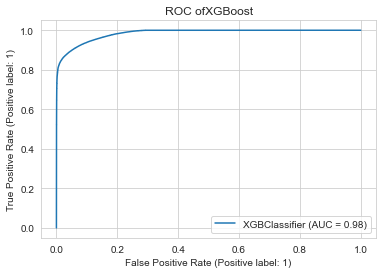

X= X_mm_corr
y= y_mm_corr
[15:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     27996
           1       0.97      0.95      0.96     49306

    accuracy                           0.95     77302
   macro avg       0.94      0.95      0.94     77302
weighted avg       0.95      0.95      0.95     77302

[[26349  1647]
 [ 2352 46954]]
0.9570939896103032
XGBoost model accuracy score: 0.9483
f1_score: 0.9591551165902336
Time taken to complete:
68.1875


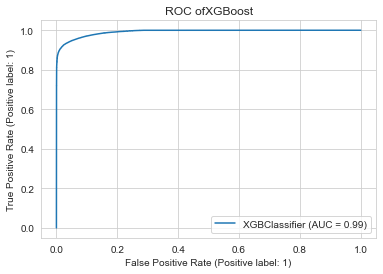

X= X_mm
y= y_mm
[15:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     27807
           1       0.97      0.95      0.96     49495

    accuracy                           0.95     77302
   macro avg       0.94      0.95      0.94     77302
weighted avg       0.95      0.95      0.95     77302

[[26097  1710]
 [ 2318 47177]]
0.95837468329166
XGBoost model accuracy score: 0.9479
f1_score: 0.959057551178061
Time taken to complete:
74.96875


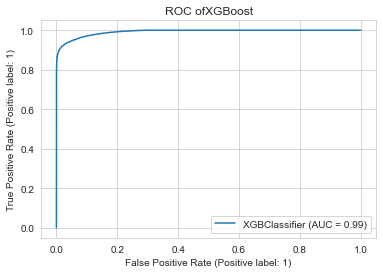

X= X_ss
y= y_ss
[16:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     27785
           1       0.96      0.95      0.96     49517

    accuracy                           0.95     77302
   macro avg       0.94      0.94      0.94     77302
weighted avg       0.95      0.95      0.95     77302

[[26030  1755]
 [ 2365 47152]]
0.9584245804480764
XGBoost model accuracy score: 0.9467
f1_score: 0.9581402909859383
Time taken to complete:
72.0625


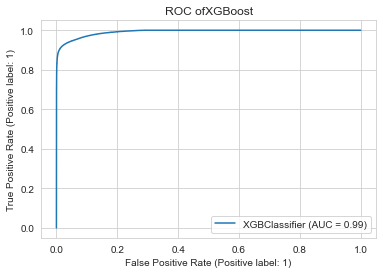

X= X_ss_corr
y= y_ss_corr
[16:00:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     28162
           1       0.96      0.95      0.96     49140

    accuracy                           0.95     77302
   macro avg       0.94      0.94      0.94     77302
weighted avg       0.95      0.95      0.95     77302

[[26402  1760]
 [ 2344 46796]]
0.9573711960348393
XGBoost model accuracy score: 0.9469
f1_score: 0.9579921388797904
Time taken to complete:
70.390625


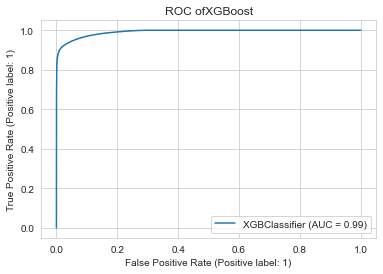

In [107]:
acc_xgb=[]
f1_xgb=[]
model = XGBClassifier()
modelAnalysis(acc_xgb,f1_xgb, model,"XGBoost")

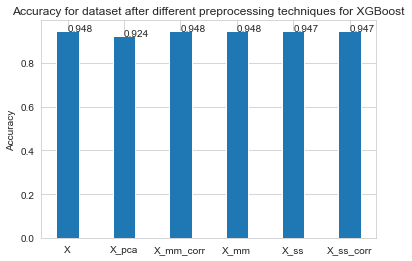

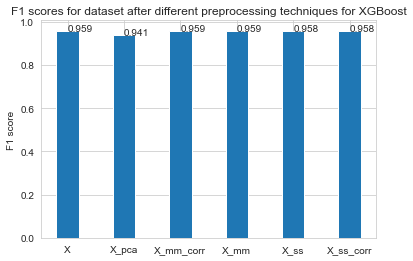

In [108]:
displayAnalysisGraphs(list1, acc_xgb,f1_xgb,"XGBoost")

**OBSERVATION: The best accuracy for XGBoost is for Standard scaling and correlation analysis. The F1 score is also good for the same**

1)F1 SCORE  decreased with applying PCA, acuracy is also less.

2)If we see for the rest of the cases the accuracy is 93%.

3)The maximum time for fitting PCA data and predicting is high as compared to fitting data after applying other preprocessing technique. 

# GB Gradient
For more work, go to: https://github.com/divyaKh/CMPE255Project/blob/main/5.ML_Models/baseline/GradientBoosterClassifer.ipynb

X= X
y= y
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     27999
           1       0.95      0.95      0.95     49303

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25281  2718]
 [ 2380 46923]]
0.9338862677481413
GB Gradient model accuracy score: 0.9341
f1_score: 0.9484759055627425
Time taken to complete:
85.28125


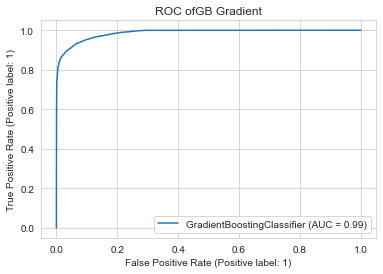

X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     27869
           1       0.90      0.96      0.93     49433

    accuracy                           0.91     77302
   macro avg       0.91      0.88      0.90     77302
weighted avg       0.91      0.91      0.90     77302

[[22475  5394]
 [ 1834 47599]]
0.9097471322995382
GB Gradient model accuracy score: 0.9065
f1_score: 0.9294319801612873
Time taken to complete:
193.796875


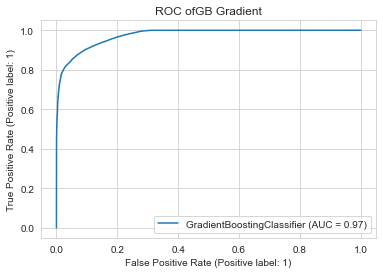

X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     27882
           1       0.94      0.95      0.95     49420

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25088  2794]
 [ 2324 47096]]
0.9341024887592795
GB Gradient model accuracy score: 0.9338
f1_score: 0.948464404390293
Time taken to complete:
78.046875


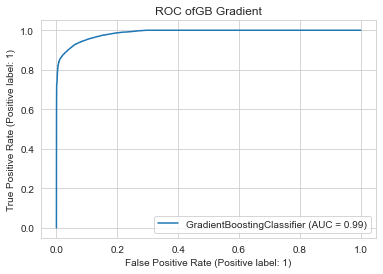

X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     27930
           1       0.94      0.95      0.95     49372

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25113  2817]
 [ 2312 47060]]
0.9338973560051228
GB Gradient model accuracy score: 0.9336
f1_score: 0.9483218974498483
Time taken to complete:
102.734375


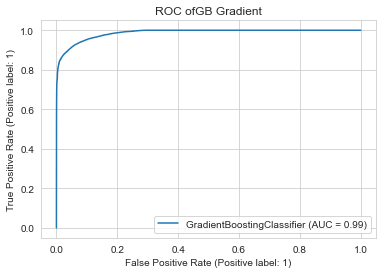

X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     27934
           1       0.94      0.95      0.95     49368

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25160  2774]
 [ 2445 46923]]
0.9349729169323229
GB Gradient model accuracy score: 0.9325
f1_score: 0.9473174178569626
Time taken to complete:
101.140625


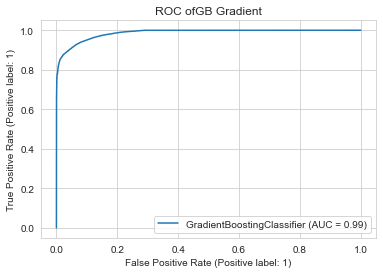

X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.91      0.90      0.91     27844
           1       0.95      0.95      0.95     49458

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25167  2677]
 [ 2482 46976]]
0.933653414351531
GB Gradient model accuracy score: 0.9333
f1_score: 0.9479472510619407
Time taken to complete:
83.59375


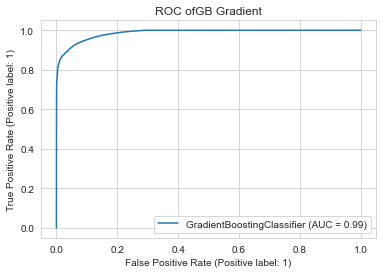

In [109]:
acc_gb=[]
f1_gb=[]
model = GradientBoostingClassifier()
modelAnalysis(acc_gb,f1_gb, model,"GB Gradient")

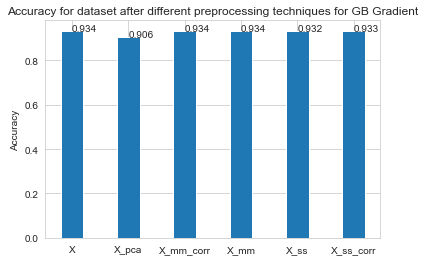

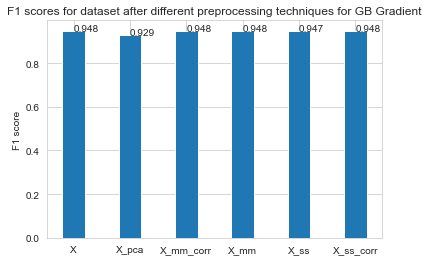

In [110]:
displayAnalysisGraphs(list1,acc_gb,f1_gb,"GB Gradient")

1)Time take to fit and predict using PCA preprocessing is high as compared to other models build from differnt preprocessing techniques.
2)Here the standard scaling and correlation, minmax scaling and standard scaling preprocessing steps yeilds the same result for the model.
3)For X_PCA:GB tree, F1 score is high than accuracy score.




# Decision Tree
For more work, go to: https://github.com/divyaKh/CMPE255Project/blob/main/5.ML_Models/baseline/DecisionTree.ipynb

X= X
y= y
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27883
           1       0.95      0.95      0.95     49419

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25475  2408]
 [ 2556 46863]]
0.9977657162182391
Decision Tree model accuracy score: 0.9358
f1_score: 0.94970108420306
Time taken to complete:
11.046875


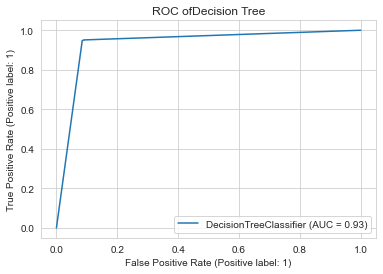

X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     27940
           1       0.93      0.93      0.93     49362

    accuracy                           0.91     77302
   macro avg       0.90      0.91      0.91     77302
weighted avg       0.91      0.91      0.91     77302

[[24610  3330]
 [ 3441 45921]]
0.997749083832767
Decision Tree model accuracy score: 0.9124
f1_score: 0.9313376532505856
Time taken to complete:
11.46875


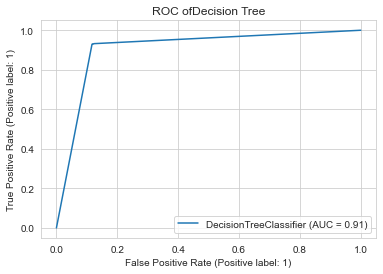

X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27793
           1       0.95      0.95      0.95     49509

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25408  2385]
 [ 2504 47005]]
0.9977601720897483
Decision Tree model accuracy score: 0.9368
f1_score: 0.9505657286726863
Time taken to complete:
3.671875


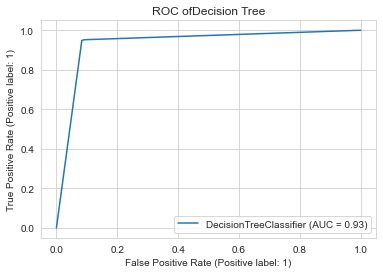

X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27783
           1       0.95      0.95      0.95     49519

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25355  2428]
 [ 2501 47018]]
0.9978211575031463
Decision Tree model accuracy score: 0.9362
f1_score: 0.9501945132117414
Time taken to complete:
4.1875


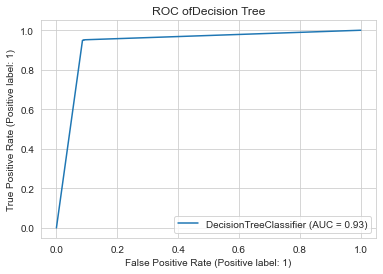

X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     28095
           1       0.95      0.95      0.95     49207

    accuracy                           0.93     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.93      0.93      0.93     77302

[[25535  2560]
 [ 2541 46666]]
0.9977934368606927
Decision Tree model accuracy score: 0.9340
f1_score: 0.9481779484522468
Time taken to complete:
4.109375


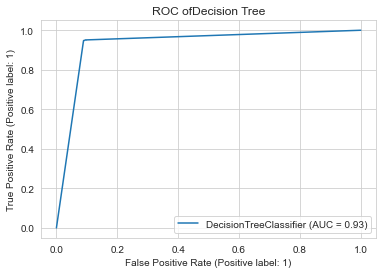

X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27895
           1       0.95      0.95      0.95     49407

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302

[[25522  2373]
 [ 2468 46939]]
0.9977379955757855
Decision Tree model accuracy score: 0.9374
f1_score: 0.9509618209260629
Time taken to complete:
3.5625


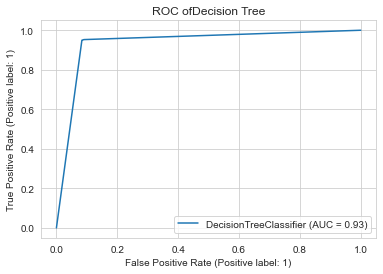

In [111]:
acc_dt=[]
f1_dt=[]
model = DecisionTreeClassifier()
modelAnalysis(acc_dt,f1_dt, model,"Decision Tree")

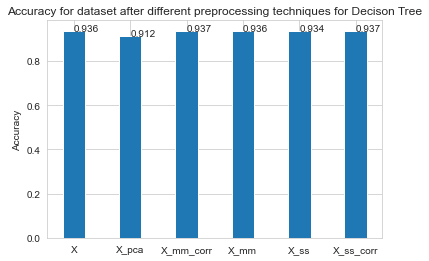

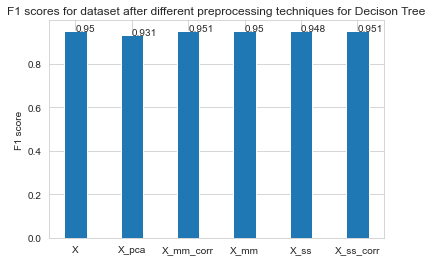

In [112]:
displayAnalysisGraphs(list1,acc_dt,f1_dt,"Decison Tree")

1)The time taken to fit and predict the data after applying standard scaling and correaltion analysis is high.

2)The accuracy and F1 score is highest in the X_ss.




# Random Forest

For more work, go to : https://github.com/divyaKh/CMPE255Project/blob/main/5.ML_Models/baseline/RandomForest.ipynb

X= X
y= y
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27974
           1       0.96      0.96      0.96     49328

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[26138  1836]
 [ 2037 47291]]
0.9978433340171092
Random Forest model accuracy score: 0.9499
f1_score: 0.9606622314763091
Time taken to complete:
45.90625


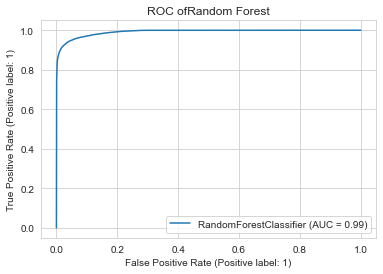

X= X_pca
y= y_pca
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     27887
           1       0.94      0.95      0.94     49415

    accuracy                           0.93     77302
   macro avg       0.93      0.92      0.92     77302
weighted avg       0.93      0.93      0.93     77302

[[24730  3157]
 [ 2351 47064]]
0.9978377898886185
Random Forest model accuracy score: 0.9287
f1_score: 0.9447187763458991
Time taken to complete:
112.625


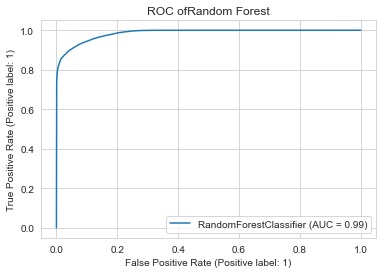

X= X_mm_corr
y= y_mm_corr
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27902
           1       0.96      0.96      0.96     49400

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[26057  1845]
 [ 1927 47473]]
0.9973166418104906
Random Forest model accuracy score: 0.9512
f1_score: 0.9617901497194027
Time taken to complete:
39.234375


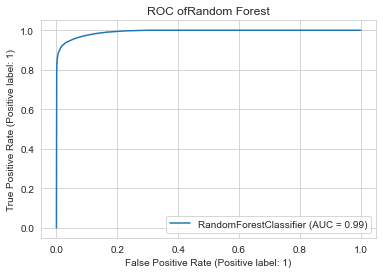

X= X_mm
y= y_mm
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27884
           1       0.96      0.96      0.96     49418

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[26047  1837]
 [ 1989 47429]]
0.9974108919948329
Random Forest model accuracy score: 0.9505
f1_score: 0.9612297839568725
Time taken to complete:
40.609375


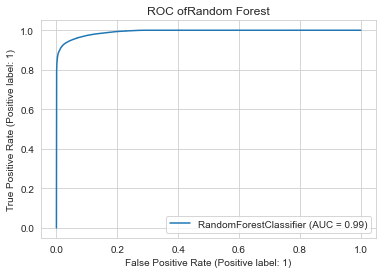

X= X_ss
y= y_ss
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27988
           1       0.96      0.96      0.96     49314

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[26039  1949]
 [ 1960 47354]]
0.9977546279612576
Random Forest model accuracy score: 0.9494
f1_score: 0.9603618037458044
Time taken to complete:
43.84375


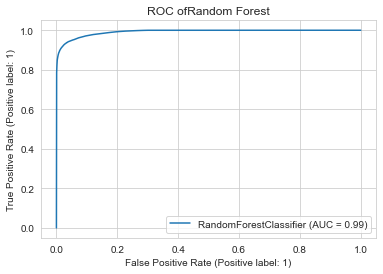

X= X_ss_corr
y= y_ss_corr
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27868
           1       0.96      0.96      0.96     49434

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302

[[26027  1841]
 [ 2022 47412]]
0.9977546279612576
Random Forest model accuracy score: 0.9500
f1_score: 0.9608560398026083
Time taken to complete:
40.75


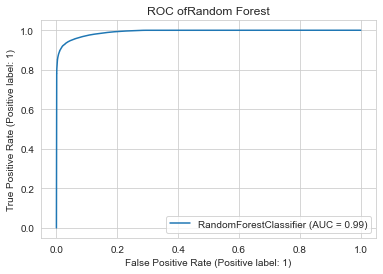

In [113]:
acc_rf=[]
f1_rf=[]
model = RandomForestClassifier()
modelAnalysis(acc_rf,f1_rf, model,"Random Forest")

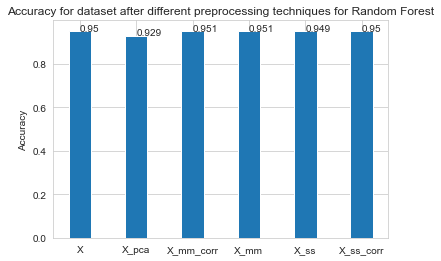

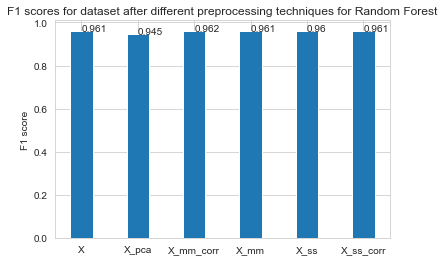

In [114]:
displayAnalysisGraphs(list1, acc_rf,f1_rf,"Random Forest")

1)The random forest classifier has maximum and similar accuracy on X_mm,X_ss,X_mm_corr,X_ss_corr.

2) The overall accuracy and F1 score is less for PCA.

3) The Time taken to fit and predict  the  model for the data :X_ss_corr is the highest.

##Visualize performance of different ML models for different Pre-Processing techniques

In [115]:
def displayComparisonGraphsOfModels(index, typeOfPreprocessing):
  acc = [acc_rf[index], acc_gb[index], acc_dt[index], acc_xgb[index]]
  list1=["XGB","GB","DT","RT"]
  
  plt.bar(list1,acc, width=0.2)
  for i in range(len(list1)):
    acc[i]=float('{:,.3f}'.format(acc[i]))
    plt.annotate(str(acc[i]), xy=(list1[i], acc[i]))
  plt.title("Accuracy comparison between different ML models "+typeOfPreprocessing)
  plt.ylabel("Accuracy")
  plt.xlabel("ML Model")
  plt.savefig("Accuracy_"+typeOfPreprocessing+".png")
  plt.show()


**WITHOUT ANY PREPROCESSING**

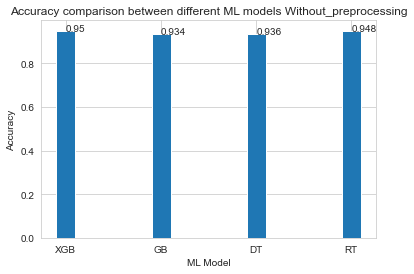

In [116]:
displayComparisonGraphsOfModels(0,"Without_preprocessing")

The accuracy for XGB classiffier works best after fitting the data without any preprocessing.

**WITH PCA AND STANDARD SCALER**

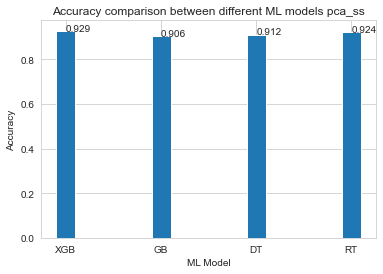

In [117]:
displayComparisonGraphsOfModels(1,"pca_ss")


The accuracy for XGB classifier works best after fitting the data with preprocessing by applying PCA and standard scaler.However, we can see the accuracy has reduced from the previous case.



**WITH REMOVING CORRELATION (AMONG FEATURES) AND MINMAX SCALING**

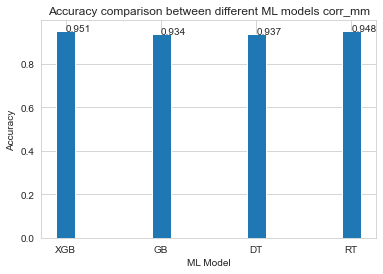

In [118]:
displayComparisonGraphsOfModels(2,"corr_mm")

The accuracy for XGB classifier works best after fitting the data with preprocessing by applying Correlation analysis and MinMax scaling.We can see the accuracy has increased from the previous case.


**WITH MINMAX SCALING**



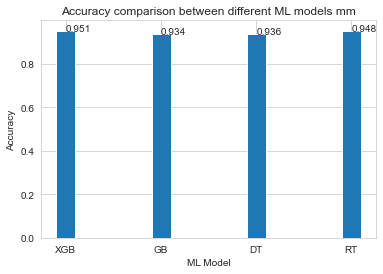

In [119]:
displayComparisonGraphsOfModels(3,"mm")

**WITH STANDARD SCALING**


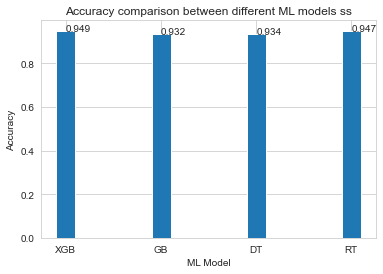

In [120]:
displayComparisonGraphsOfModels(4,"ss")

**WITH STANDARD SCALING AND CORRELATION**

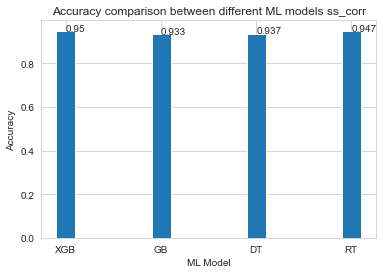

In [121]:
displayComparisonGraphsOfModels(5,"ss_corr")




---





In [122]:
list1=["XGB","GB","DT","RT"]
df = pd.DataFrame(list1, columns=['Model'])
df['accuracy_without_preprocessing'] = [acc_rf[0], acc_gb[0], acc_dt[0], acc_xgb[0]]
df['accuracy_with_pca_standardscaler'] = [acc_rf[1], acc_gb[1], acc_dt[1], acc_xgb[1]]
df['accuracy_with_minmax_correlation'] = [acc_rf[2], acc_gb[2], acc_dt[2], acc_xgb[2]]
df['accuracy_with_minmax'] = [acc_rf[3], acc_gb[3], acc_dt[3], acc_xgb[3]]
df['accuracy_with_standardscaler'] = [acc_rf[4], acc_gb[4], acc_dt[4], acc_xgb[4]]
df['accuracy_with_standardscaler_correlation'] = [acc_rf[5], acc_gb[5], acc_dt[5], acc_xgb[5]]

In [123]:
df

,Model,accuracy_without_preprocessing,accuracy_with_pca_standardscaler,accuracy_with_minmax_correlation,accuracy_with_minmax,accuracy_with_standardscaler,accuracy_with_standardscaler_correlation
0,XGB,0.950,0.929,0.951,0.951,0.949,0.950
1,GB,0.934,0.906,0.934,0.934,0.932,0.933
2,DT,0.936,0.912,0.937,0.936,0.934,0.937
3,RT,0.948,0.924,0.948,0.948,0.947,0.947


[16:17:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

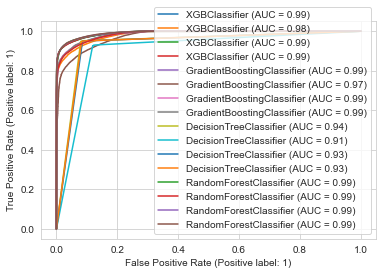

In [124]:
from sklearn.metrics import plot_roc_curve

model_XGB = xgb.XGBClassifier()
model_GB = GradientBoostingClassifier()
model_DT = DecisionTreeClassifier()
model_RF = RandomForestClassifier()

dataset = [X,X_pca,X_mm_corr,X_mm,X_ss,X_ss_corr]
label=[y,y_pca,y_mm_corr,y_mm,y_ss,y_ss_corr]
classifiers = [model_XGB, model_GB, model_DT,model_RF]
ax = plt.gca()
for model in classifiers:
    for j in range(0,len(list1)):
      X_train, X_test, y_train, y_test = train_test_split(dataset[j], label[j], test_size=0.3)
      model.fit(X_train,y_train)
      plot_roc_curve(model, X_test, y_test, ax=ax)

   
